 The Titanic dataset contains information from the Titanic ship.The dataset contains the following Coulmns :

	survived	Indicates whether a passenger survived (1) or died (0).
	sex		Represents the gender of the passenger, typically categorized as male or female.
	age		The age of the passenger, often represented as a numerical value.
	n_siblings_spouses	Indicates the number of siblings or spouses traveling with the passenger.
	parch	Represents the number of parents or children traveling with the passenger.
	fare	The amount of money spent on the ticket.
	class	Represents the passenger class  (e.g., first, second, or third class).
	deck	Indicates where the passenger's cabin is located.
	embark_town		Indicates the port where the passenger embarked from.
	alone	Indicates whether the passenger is traveling alone or with a relative.
    
   we will build a predictive model that answers the question:
      *what sorts of people were more likely to survive?*


# Importing Libraries

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Importing The Dataset

In [62]:
data = pd.read_csv("Data_For_project_1.csv")

In [3]:
data.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [4]:
data.tail()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
622,0,male,28.0,0,0,10.50,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.05,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.00,First,B,Southampton,y
625,0,female,28.0,1,2,23.45,Third,unknown,Southampton,n
626,0,male,32.0,0,0,7.75,Third,unknown,Queenstown,y


# Understanding Our Data

In [5]:
data.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [6]:
data.shape

(627, 10)

In [7]:
data['sex'].value_counts()

male      410
female    217
Name: sex, dtype: int64

In [8]:
data['survived'].value_counts()

0    384
1    243
Name: survived, dtype: int64

In [9]:
data['deck'].unique()

array(['unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'], dtype=object)

In [10]:
data['deck'].value_counts()

unknown    481
C           43
B           37
E           23
D           22
A           11
F            6
G            4
Name: deck, dtype: int64

In [11]:
data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

In [12]:
data['embark_town'].value_counts()

Southampton    450
Cherbourg      123
Queenstown      53
unknown          1
Name: embark_town, dtype: int64

# Visualizing The Data

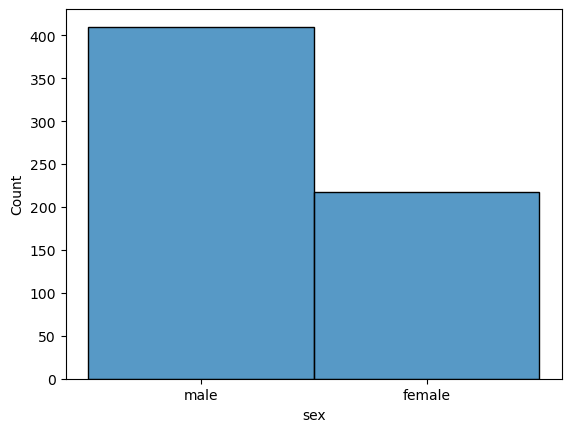

In [63]:
sns.histplot(data=data, x="sex");

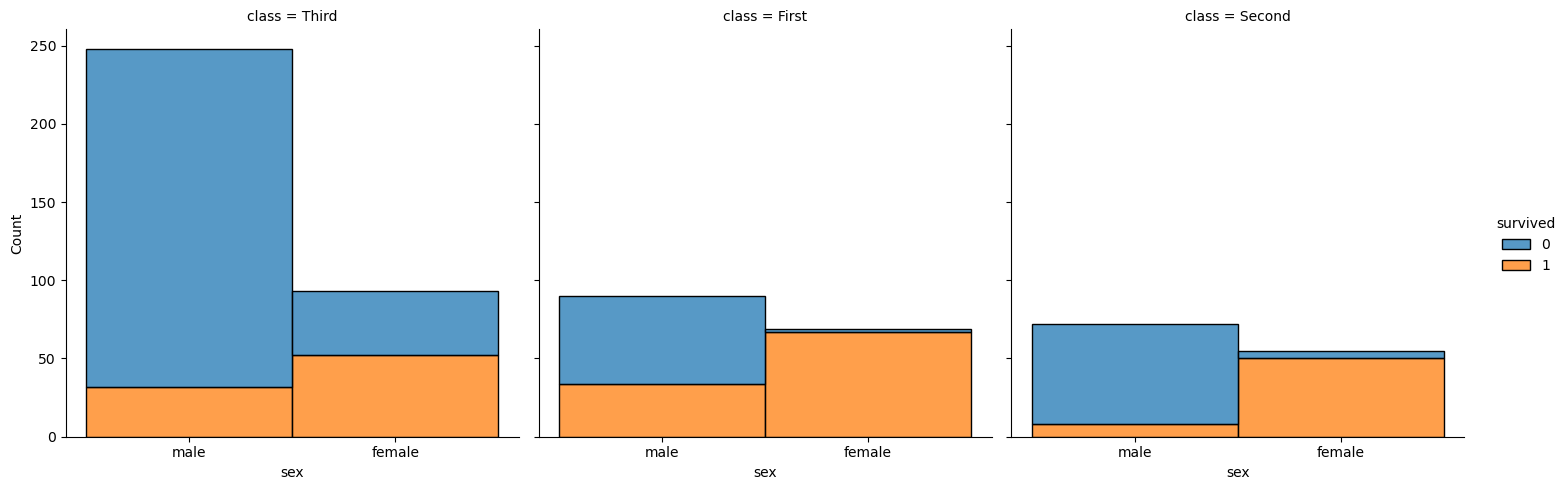

In [64]:
sns.displot(data=data, x="sex", hue="survived", col="class" , multiple = "stack");

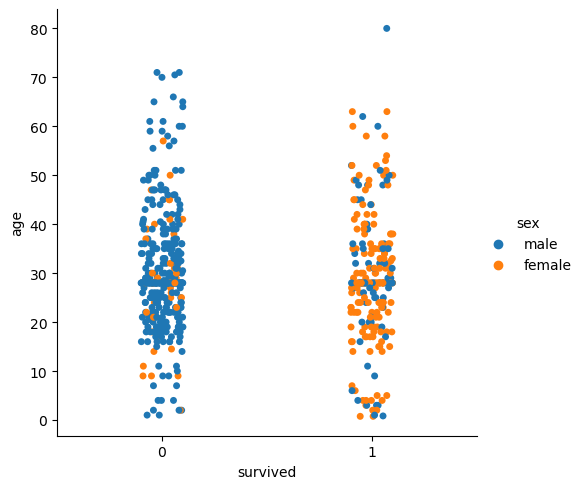

In [65]:
sns.catplot(x="survived", y="age", hue='sex' , data=data);

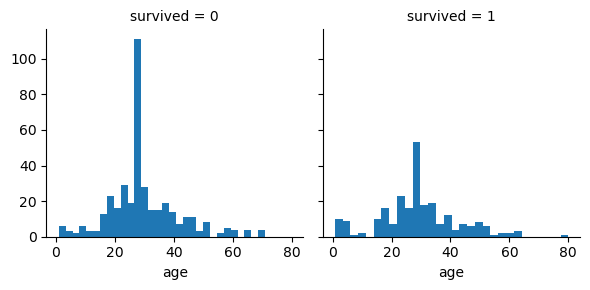

In [66]:
# Visualizing the survival of passengers based on their age

v2 = sns.FacetGrid(data, col='survived')

v2.map(plt.hist, 'age', bins=30)

<Axes: xlabel='survived', ylabel='count'>

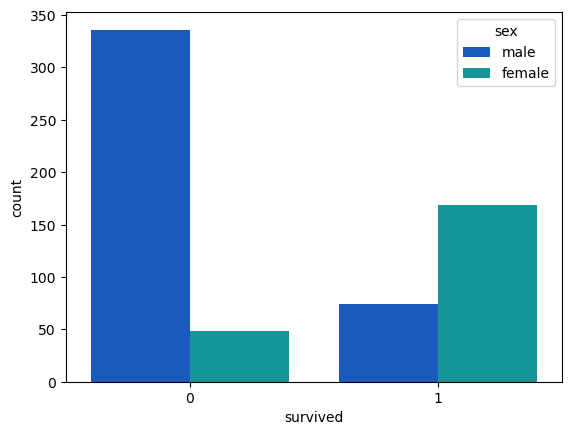

In [67]:
sns.countplot(x='survived',hue='sex',data=data ,palette='winter')

# Cleaning Data

In [68]:
data.isna().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [69]:
data.duplicated().sum()

69

In [70]:
data.drop_duplicates(inplace=True)

In [71]:
data.duplicated().sum()

0

# Data Pre-processing

In [72]:
data=data.drop(['deck','age','n_siblings_spouses','embark_town'],axis=1)

In [73]:
data.head(5)

,survived,sex,parch,fare,class,alone
0,0,male,0,7.2500,Third,n
1,1,female,0,71.2833,First,n
2,1,female,0,7.9250,Third,y
3,1,female,0,53.1000,First,n
4,0,male,0,8.4583,Third,y


# Labeling Data

In [74]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Create a copy of the data to apply label encoding

# Apply LabelEncoder to the categorical columns
data['sex'] = le.fit_transform(data['sex'])
data['class'] = le.fit_transform(data['class'])
data['alone'] = le.fit_transform(data['alone'])


data.head(5)

,survived,sex,parch,fare,class,alone
0,0,1,0,7.2500,2,0
1,1,0,0,71.2833,0,0
2,1,0,0,7.9250,2,1
3,1,0,0,53.1000,0,0
4,0,1,0,8.4583,2,1


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

          survived       sex     parch      fare     class     alone
survived  1.000000 -0.562488  0.079526  0.247788 -0.336921 -0.178160
sex      -0.562488  1.000000 -0.217856 -0.162669  0.145966  0.285334
parch     0.079526 -0.217856  1.000000  0.182310  0.046310 -0.566479
fare      0.247788 -0.162669  0.182310  1.000000 -0.540128 -0.223609
class    -0.336921  0.145966  0.046310 -0.540128  1.000000  0.114812
alone    -0.178160  0.285334 -0.566479 -0.223609  0.114812  1.000000


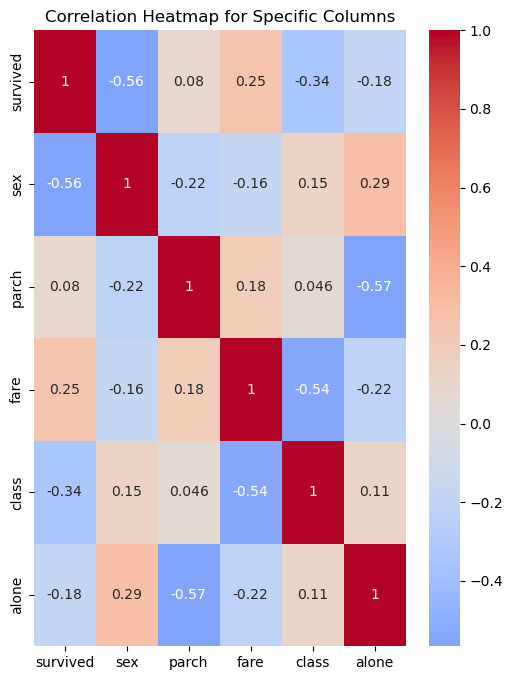

In [76]:
corr_matrix = data.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(6, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for Specific Columns')

plt.show()

In [77]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X = data.drop('survived', axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Logistic Regression Classifier
train = LogisticRegression(max_iter=300, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.8125


In [79]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57 15]
 [ 6 34]]


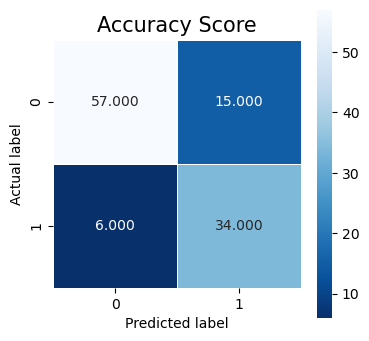

In [80]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

# Saving Model

In [81]:
import joblib
model_filename = 'MODEL.joblib'
joblib.dump(train, model_filename)
print(f"Model saved as {model_filename}")

Model saved as MODEL.joblib


# Testing The Model

In [82]:
# Load the saved model
import joblib
model_data = joblib.load(model_filename)


In [83]:
    test = model_data.predict(X_test.head(2))
    test

array([1, 0], dtype=int64)

# Random Forest Classification

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [332]:
data = pd.read_csv("New_Data.csv")
X = data.drop('survived',axis=1)
y = data['survived']

In [333]:
data.head()

,survived,sex,parch,fare,class,alone
0,0,1,0,7.2500,2,0
1,1,0,0,71.2833,0,0
2,1,0,0,7.9250,2,1
3,1,0,0,53.1000,0,0
4,0,1,0,8.4583,2,1


In [352]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)


In [353]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [354]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000)
classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000)

In [355]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Example classifier
# clf = RandomForestClassifier()

# Cross-validation (assuming X and y are your data and labels)
scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation

average_accuracy = scores.mean()
print(average_accuracy)

0.7526866151866152


In [356]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [357]:
from sklearn.metrics import accuracy_score

# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.8392857142857143


In [358]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[60 11]
 [ 7 34]]


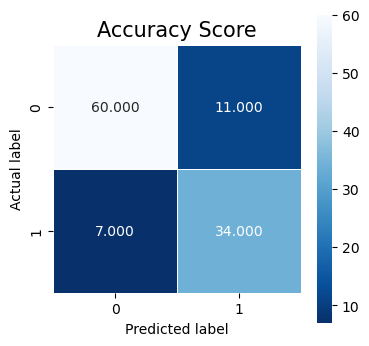

In [359]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [427]:
import joblib
model_filename = 'random_forest.joblib'
joblib.dump(classifier, model_filename)
print(f"Model saved as {model_filename}")

Model saved as random_forest.joblib


In [428]:
Model_Name = joblib.load("./random_forest.joblib")

In [ ]:
test = Model_Name.predict(X_test[:1])
test

# Decision Tree Classification

In [362]:
data = pd.read_csv("New_Data.csv")
X = data.drop('survived',axis=1)
y = data['survived']

In [391]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =42)


In [403]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [400]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [401]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [404]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.8035714285714286


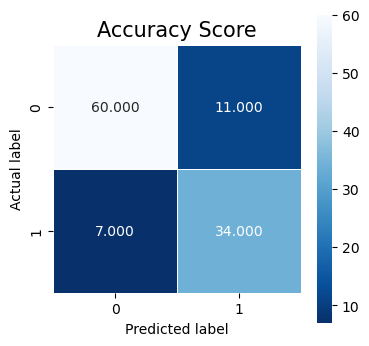

In [405]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [424]:
import joblib
model_filename = 'DecisionTree.joblib'
joblib.dump(classifier, model_filename)
print(f"Model saved as {model_filename}")

Model saved as DecisionTree.joblib


In [425]:
loaded_model = joblib.load("./DecisionTree.joblib")

In [426]:
test = loaded_model.predict(X_test[:1])
test

array([0], dtype=int64)